<a href="https://colab.research.google.com/github/bobyrajtamuli/Customer-Analytics/blob/main/Session_3_Behavioral_Clustering_Bank_Customers_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Behavioral Clustering of Bank Customers
This notebook demonstrates how to use clustering techniques to segment banking customers and interpret them through behavioral finance principles.

## Step 1: Import Required Libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
import plotly.express as px
from google.colab import files


## Step 2: Upload and Load Data

In [2]:

uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

# Drop unnecessary columns if present
drop_cols = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_',
             'Naive_Bayes_Classifier_Attrition_Flag_Income_Category_Months_on_book']
df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore', inplace=True)

# Filter if Attrition_Flag exists
if 'Attrition_Flag' in df.columns:
    df = df[df['Attrition_Flag'].isin(['Existing Customer', 'Attrited Customer'])]


Saving BankChurners.csv to BankChurners.csv
Saving customer_churn.csv to customer_churn.csv


## Step 3: Select Features and Scale

In [3]:

features = df[['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Relationship_Count']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


## Step 4: Apply KMeans Clustering

In [4]:

kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Labels'] = kmeans.fit_predict(scaled_features)


## Step 5: Apply Hierarchical Clustering

In [5]:

linked = linkage(scaled_features, method='ward')
df['Hierarchical_Labels'] = fcluster(linked, 4, criterion='maxclust')


## Step 6: Apply DBSCAN Clustering

In [6]:

dbscan = DBSCAN(eps=0.6, min_samples=10)
df['DBSCAN_Labels'] = dbscan.fit_predict(scaled_features)


## Step 7: PCA for Visualization

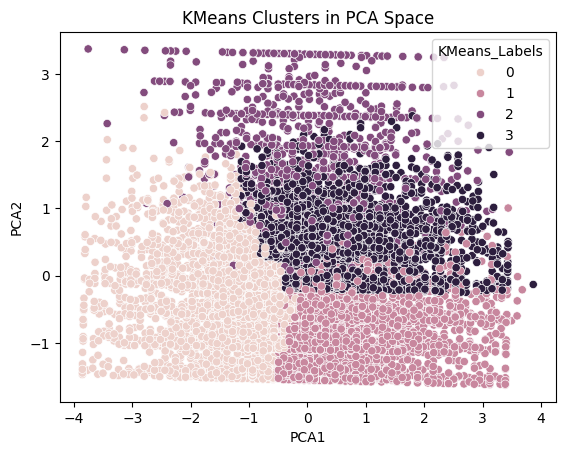

In [7]:

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans_Labels')
plt.title('KMeans Clusters in PCA Space')
plt.show()


## Step 8: Evaluate Clustering Methods with ARI

In [8]:

le = LabelEncoder()
if 'Attrition_Flag' in df.columns:
    y_true = le.fit_transform(df['Attrition_Flag'])
    print("KMeans ARI:", adjusted_rand_score(y_true, df['KMeans_Labels']))
    print("Hierarchical ARI:", adjusted_rand_score(y_true, df['Hierarchical_Labels']))
    print("DBSCAN ARI:", adjusted_rand_score(y_true, df['DBSCAN_Labels']))
else:
    print("Attrition_Flag not available to evaluate ARI.")


KMeans ARI: 0.004685168714615946
Hierarchical ARI: 0.003471180143313777
DBSCAN ARI: 0.009354070048751897


## Step 9: Advanced Visualizations

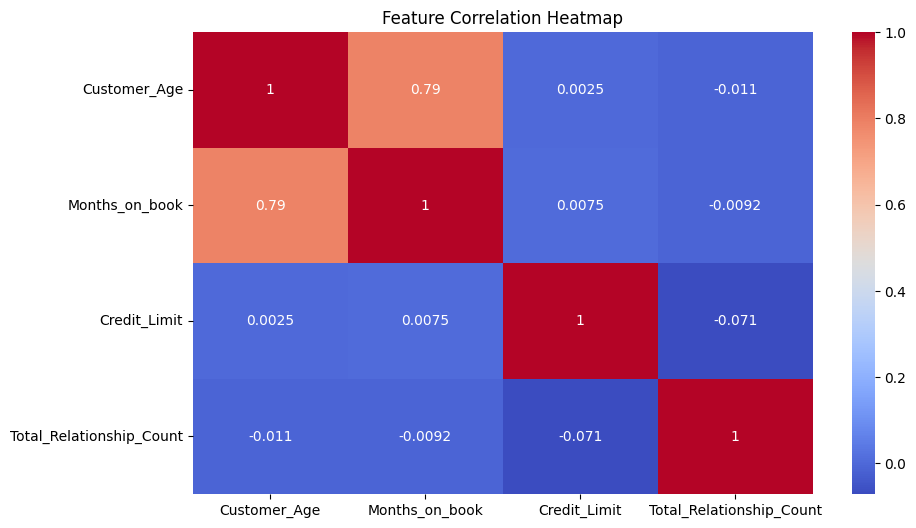

In [9]:

# Heatmap of Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df[features.columns].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


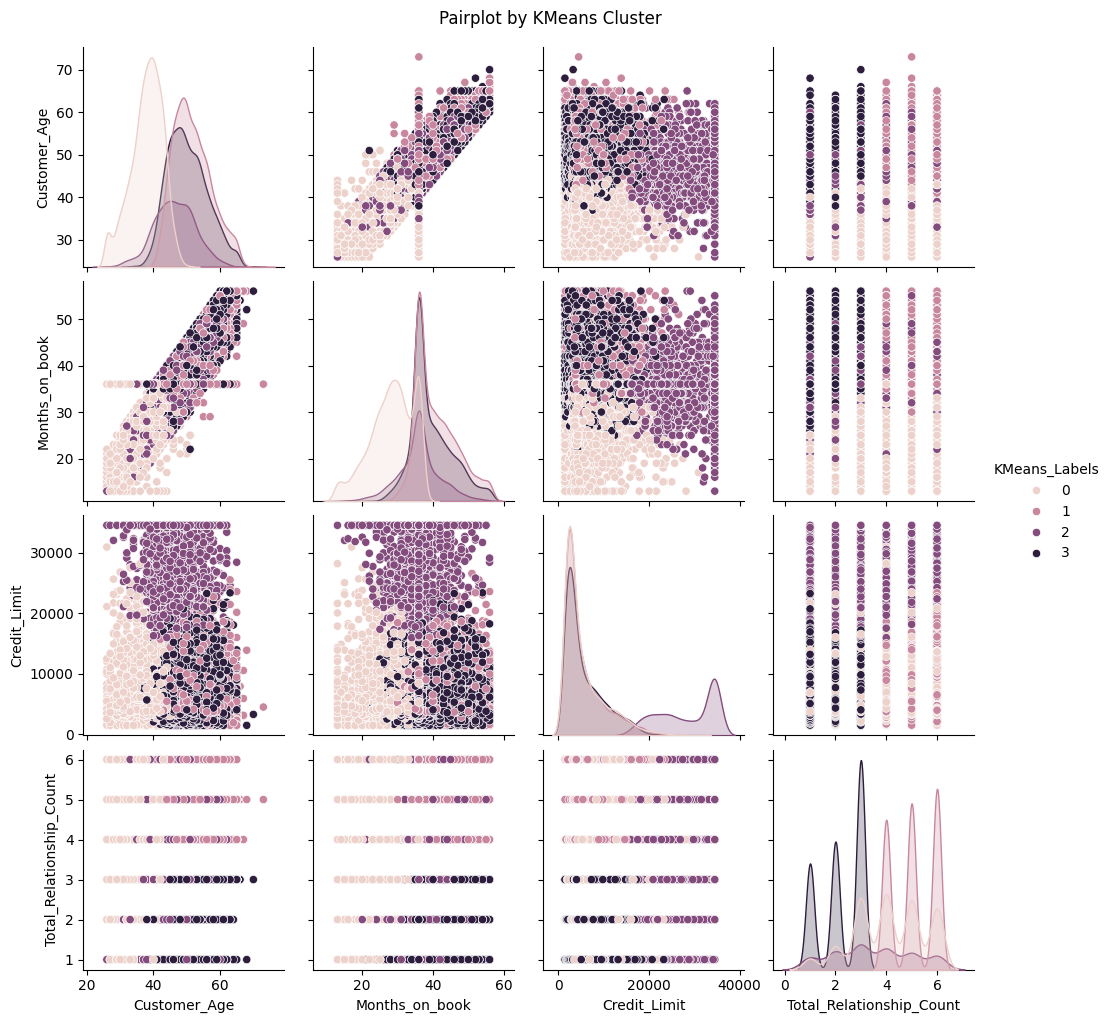

In [10]:

# Pairplot by Cluster
sns.pairplot(df[['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Relationship_Count', 'KMeans_Labels']], hue='KMeans_Labels')
plt.suptitle('Pairplot by KMeans Cluster', y=1.02)
plt.show()


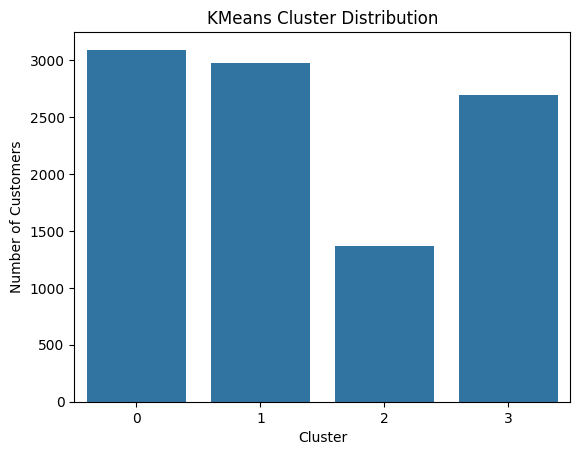

In [11]:

# Cluster Count Plot
sns.countplot(x='KMeans_Labels', data=df)
plt.title('KMeans Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


In [12]:

# 3D Scatter Plot with Plotly
fig = px.scatter_3d(df, x='Customer_Age', y='Credit_Limit', z='Total_Relationship_Count',
                    color='KMeans_Labels', title='3D Cluster View (KMeans)', opacity=0.7)
fig.show()
